# Perfume Classifier

First, we import the necessary libraries required to create our model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)


Reading our dataset.

In [ ]:
perfume_df = pd.read_excel('dataset.xlsx')
perfume_df

,ajayeb,64558,64556,64543,64543.1,64541,64543.2,64543.3,64541.1,64541.2,...,64541.8,64541.9,64541.10,64541.11,64541.12,64541.13,64528.2,64528.3,64528.4,64528.5
0,ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,...,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472
1,amreaj,57040,57040,57040,58041,58041,58041,58041,57042,57042,...,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041
2,aood,71083,72087,71091,71095,71099,72103,71099,72099,72099,...,72095,71095,71095,72103,71103,71103,71103,72103,72103,72098
3,asgar_ali,68209,68209,68216,68216,68223,68223,68223,68223,68230,...,68230,67224,67217,67217,68223,68223,68223,68223,68223,68230
4,bukhoor,71046,71046,71046,71046,71046,71046,71046,71046,71046,...,70049,70049,70049,70048,70049,70048,70046,70046,70048,71048
5,burberrry,61096,61096,60093,60092,60093,60093,61096,61096,61096,...,60089,60089,60089,60092,60089,60089,60089,61088,61088,60089
6,dehenalaod,68132,69137,69137,68137,68137,69142,69142,68137,68137,...,69142,69142,69142,69142,69142,68137,69137,69137,69137,69136
7,junaid,71590,71575,71574,71560,71560,71559,72573,71559,71559,...,72557,72556,72556,72557,72556,72542,72542,72556,72556,72556
8,kausar,74631,74649,74650,74650,74650,74632,74632,74632,73633,...,73617,73585,73584,73600,73601,73601,73585,73585,73585,73585
9,rose,62999,62999,62999,62999,62999,62999,61999,62999,62999,...,62999,62999,62999,62999,62999,61999,62999,62999,62999,61999


Obtaining the dimensions of our dataset and making some modifications.

In [ ]:
perfume_df.shape

(19, 29)

In [ ]:
perfume_df['perfume'] = perfume_df['ajayeb']
perfume_df = perfume_df.drop(['ajayeb'], axis=1)
perfume_df



,64558,64556,64543,64543.1,64541,64543.2,64543.3,64541.1,64541.2,64541.3,...,64541.9,64541.10,64541.11,64541.12,64541.13,64528.2,64528.3,64528.4,64528.5,perfume
0,60502,60489,61485,60487,61485,61513,60515,60500,60500,60487,...,60472,60461,61470,60487,60487,61485,60487,60472,60472,ajmal
1,57040,57040,57040,58041,58041,58041,58041,57042,57042,58043,...,58041,58041,58041,58041,58041,58041,58041,58041,58041,amreaj
2,71083,72087,71091,71095,71099,72103,71099,72099,72099,73098,...,71095,71095,72103,71103,71103,71103,72103,72103,72098,aood
3,68209,68209,68216,68216,68223,68223,68223,68223,68230,68230,...,67224,67217,67217,68223,68223,68223,68223,68223,68230,asgar_ali
4,71046,71046,71046,71046,71046,71046,71046,71046,71046,70046,...,70049,70049,70048,70049,70048,70046,70046,70048,71048,bukhoor
5,61096,61096,60093,60092,60093,60093,61096,61096,61096,61096,...,60089,60089,60092,60089,60089,60089,61088,61088,60089,burberrry
6,68132,69137,69137,68137,68137,69142,69142,68137,68137,68137,...,69142,69142,69142,69142,68137,69137,69137,69137,69136,dehenalaod
7,71590,71575,71574,71560,71560,71559,72573,71559,71559,71559,...,72556,72556,72557,72556,72542,72542,72556,72556,72556,junaid
8,74631,74649,74650,74650,74650,74632,74632,74632,73633,73650,...,73585,73584,73600,73601,73601,73585,73585,73585,73585,kausar
9,62999,62999,62999,62999,62999,62999,61999,62999,62999,62999,...,62999,62999,62999,62999,61999,62999,62999,62999,61999,rose


Obtaining the list of perfume names.

In [ ]:
perfumes = list(perfume_df.iloc[:,-1])
perfumes

['ajmal',
 'amreaj',
 'aood',
 'asgar_ali',
 'bukhoor',
 'burberrry',
 'dehenalaod',
 'junaid',
 'kausar',
 'rose',
 'solidmusk',
 'TeaTreeOil',
 'raspberry',
 'RoseMusk',
 'strawberry',
 'constrected2',
 'carolina_herrera',
 "oudh_ma'alattar",
 'constrected']

Checking our dataset for any missing values.

In [ ]:

perfume_df.isnull().sum()

64558       0
64556       0
64543       0
64543.1     0
64541       0
64543.2     0
64543.3     0
64541.1     0
64541.2     0
64541.3     0
64541.4     0
64541.5     0
64541.6     0
64528       0
64528.1     0
63529       0
63529.1     0
64541.7     0
64541.8     0
64541.9     0
64541.10    0
64541.11    0
64541.12    0
64541.13    0
64528.2     0
64528.3     0
64528.4     0
64528.5     0
perfume     0
dtype: int64

Here, we create a new dataframe with 1 column for the olfactometer readings and the other column for the scent or type of perfume.

In [ ]:
perfume_new_df = pd.DataFrame([], columns= ['Observation', 'Perfume'])
perfume_new_df

,Observation,Perfume


Labelling the observed readings with the perfume scent it belongs to.

In [ ]:
observations = np.array([])
labels = np.array([])

for perfume in range(len(perfumes)):
  for i in range(27):
    obs, label = perfume_df.iloc[perfume,i], perfume_df.iloc[perfume,-1]
    observations = np.append(observations, obs)
    labels = np.append(labels, label)


Converting the array to panda series and panda series to a dataframe.

In [ ]:
observations = pd.Series(observations)
labels = pd.Series(labels)


In [ ]:
perfume_new_df.Observation = observations
perfume_new_df.Perfume = labels



In [ ]:
perfume_new_df = pd.DataFrame(perfume_new_df)
perfume_new_df


,Observation,Perfume
0,60502.0,ajmal
1,60489.0,ajmal
2,61485.0,ajmal
3,60487.0,ajmal
4,61485.0,ajmal
...,...,...
508,66145.0,constrected
509,66145.0,constrected
510,66145.0,constrected
511,66145.0,constrected


Obtaining the size of our dataframe.

In [ ]:
perfume_new_df.shape

(513, 2)

In [ ]:
perfume_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  513 non-null    float64
 1   Perfume      513 non-null    object 
dtypes: float64(1), object(1)
memory usage: 8.1+ KB


Here, we shuffle our dataset to prevent biasing.

In [ ]:
perfume_new_df = perfume_new_df.sample(frac= 1, random_state= 42).reset_index(drop = True)

In [ ]:
perfume_new_df.head()

,Observation,Perfume
0,82440.0,TeaTreeOil
1,65146.0,constrected
2,64061.0,carolina_herrera
3,60089.0,burberrry
4,65146.0,constrected


In [ ]:
pd.DataFrame(perfume_new_df.groupby('Perfume').describe()).T

Perfume            RoseMusk    TeaTreeOil         ajmal        amreaj  \
Observation count      27.0     27.000000     27.000000     27.000000   
            mean    85056.0  82428.111111  60790.148148  57819.148148   
            std         0.0    191.384296    464.150730    423.861979   
            min     85056.0  82372.000000  60461.000000  57040.000000   
            25%     85056.0  82382.000000  60487.000000  58041.000000   
            50%     85056.0  82383.000000  60500.000000  58041.000000   
            75%     85056.0  82394.000000  61476.500000  58041.000000   
            max     85056.0  83382.000000  61526.000000  58043.000000   

Perfume                    aood     asgar_ali       bukhoor     burberrry  \
Observation count     27.000000     27.000000     27.000000     27.000000   
            mean   71800.074074  68111.740741  70269.111111  60462.185185   
            std      608.412178    321.575639    640.193440    493.504036   
            min    71083.000000  67217.000000  69046.000000  60089.000000   
            25%    71101.000000  68219.500000  70046.000000  60089.000000   
            50%    72091.000000  68223.000000  70048.000000  60092.000000   
            75%    72099.000000  68226.500000  71046.000000  61092.000000   
            max    73098.000000  68230.000000  71046.000000  61096.000000   

Perfume            carolina_herrera   constrected  constrected2    dehenalaod  \
Observation count         27.000000     27.000000     27.000000     27.000000   
            mean       64208.666667  65628.074074  66568.814815  68806.259259   
            std          986.219433    509.428709    537.646226    481.858788   
            min        63052.000000  65146.000000  65765.000000  68132.000000   
            25%        63068.500000  65146.000000  66253.000000  68139.500000   
            50%        64065.000000  65151.000000  66722.000000  69137.000000   
            75%        65057.500000  66145.000000  66761.500000  69142.000000   
            max        66054.000000  66151.000000  67736.000000  69142.000000   

Perfume                  junaid        kausar  oudh_ma'alattar     raspberry  \
Observation count     27.000000     27.000000        27.000000     27.000000   
            mean   72194.111111  73995.185185     66834.555556  79443.444444   
            std      491.558145    509.082058       492.471892    506.369684   
            min    71559.000000  73584.000000     66198.000000  78999.000000   
            25%    71567.000000  73601.000000     66211.000000  78999.000000   
            50%    72556.000000  73633.000000     67197.000000  78999.000000   
            75%    72564.000000  74632.000000     67207.000000  79999.000000   
            max    72588.000000  74667.000000     67217.000000  79999.000000   

Perfume                    rose     solidmusk    strawberry  
Observation count     27.000000     27.000000     27.000000  
            mean   62887.888889  46014.814815  71665.666667  
            std      320.256308      0.395847    480.384461  
            min    61999.000000  46014.000000  70999.000000  
            25%    62999.000000  46015.000000  70999.000000  
            50%    62999.000000  46015.000000  71999.000000  
            75%    62999.000000  46015.000000  71999.000000  
            max    62999.000000  46015.000000  71999.000000

Visually representing our dataframe using graphs for better analysis.

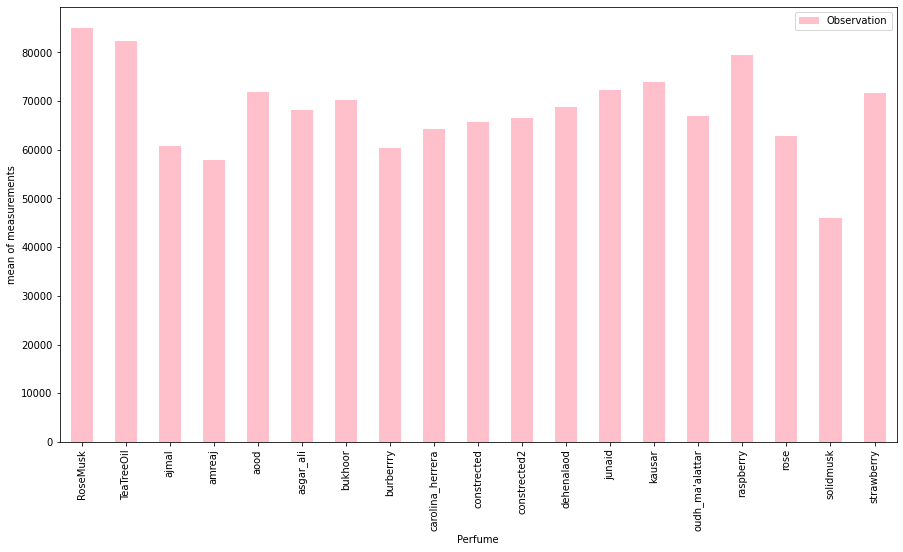

In [ ]:
perfume_new_df.groupby('Perfume').mean().plot(kind = 'bar', figsize=(15,8), color="pink")
plt.ylabel('mean of measurements')
plt.show()


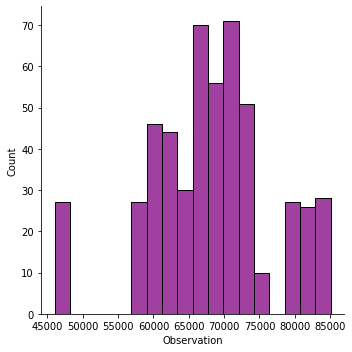

In [ ]:
sns.displot(perfume_new_df.Observation, color="purple")

Encoding our labels into numericals

In [ ]:
le = LabelEncoder()
perfume_new_df['Label'] = le.fit_transform(perfume_new_df['Perfume'])


In [ ]:
x = perfume_new_df['Observation'].to_numpy().reshape(-1,1)
y = perfume_new_df['Label']

Splitting our model into testing and training datasets.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


Building our model and making predictions with random tree.

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

In [ ]:
print('Accuracy Score - ',  accuracy_score(y_test, y_pred))


Accuracy Score -  1.0


Building our model and making predictions with random forest.

In [ ]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [ ]:
print('Accuracy Score - ',  accuracy_score(y_test, y_pred))


Accuracy Score -  0.9935064935064936


Both the above models give us a great accuracy score however, we observe that decision tree classifier model gives us a better accuracy.